# Linear

In [3]:
import numpy as np
import dom

Plot settings:

In [1]:
import matplotlib
%matplotlib inline
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.right'] = True
matplotlib.rcParams['ytick.direction'] = 'in'
import matplotlib.pyplot as plt
matplotlib.rcParams['font.size'] = 34
matplotlib.rcParams['lines.linewidth'] = 4
matplotlib.rcParams['patch.linewidth'] = 3
matplotlib.rcParams['axes.linewidth'] = 2
matplotlib.rcParams['xtick.major.size'] = 15
matplotlib.rcParams['xtick.major.width'] = 2
matplotlib.rcParams['ytick.major.size'] = 15
matplotlib.rcParams['ytick.major.width'] = 2
from matplotlib.patches import ConnectionPatch

## Step vs. delta

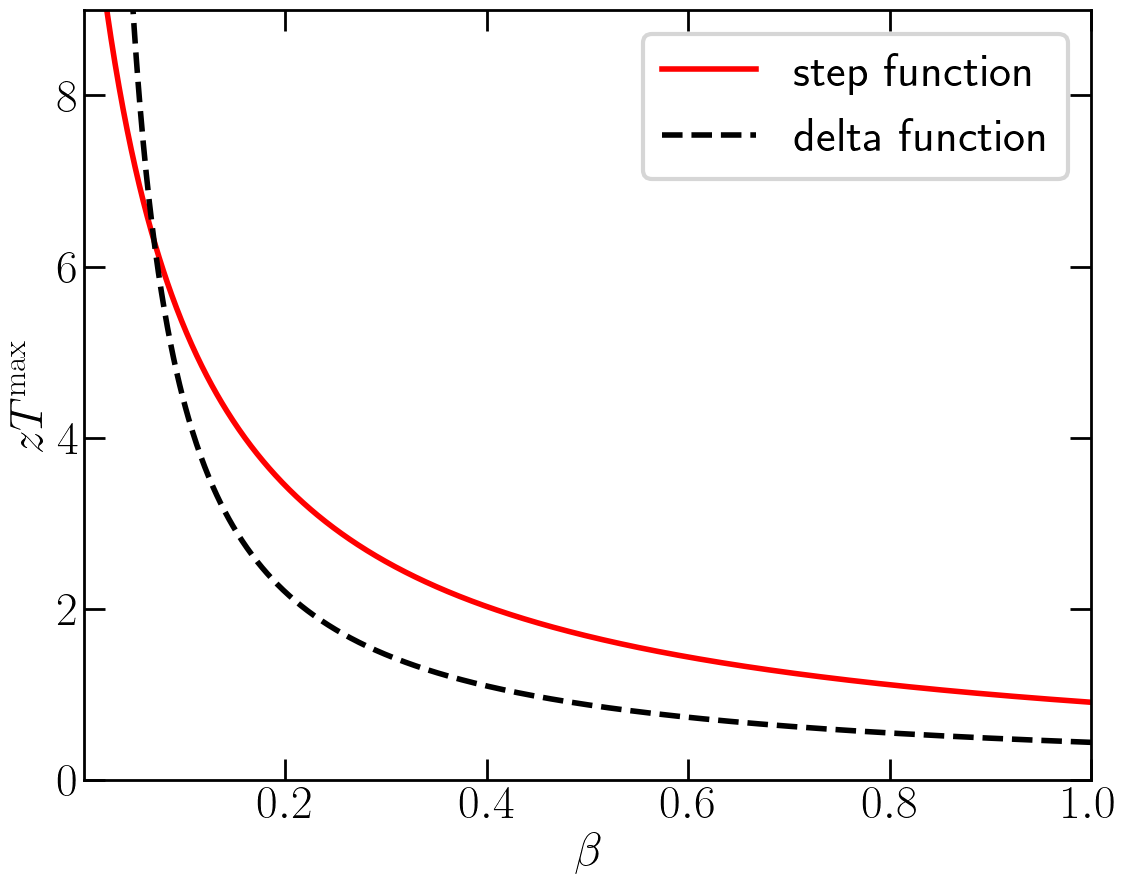

In [4]:
def step_vs_delta():
    b2fb = 0.43922883989064515
    beta = np.linspace(1, 0, num=1000, endpoint=False)
    Mahan = b2fb / beta
    # b = 2.4
    # a1 = I1stp**2 / I0stp # 0.9865492318944619
    # a2 = I2stp - a1 # 0.08681796767013206
    a1 = 0.9865492318944619
    a2 = 0.08681796767013206
    step = a1 / (a2 + beta)
    %matplotlib inline
    # matplotlib.rcParams.update({'font.size': 34})
    _, ax = plt.subplots(figsize=(13, 10))
    ax.plot(beta, step, 'r', label=r'step function')
    ax.plot(beta, Mahan, 'k--', label=r'delta function')
    ax.set_xlabel(r"$\beta$") # 
    ax.set_ylabel(r'$zT^\mathrm{max}$')
    ax.legend()
    ax.set_ylim([0,9])
    ax.set_xlim([0,1])
    ax.set_xticks([0.2,0.4,0.6,0.8,1.0])
step_vs_delta()

## Constant density of modes

In [35]:
from equation import solve4beta
const_opt = solve4beta(dom.const, beta_range=np.logspace(-7,3,num=501))
# np.savetxt('const_1e7.csv', const_opt, delimiter=',')

beta start at 1.0


plot

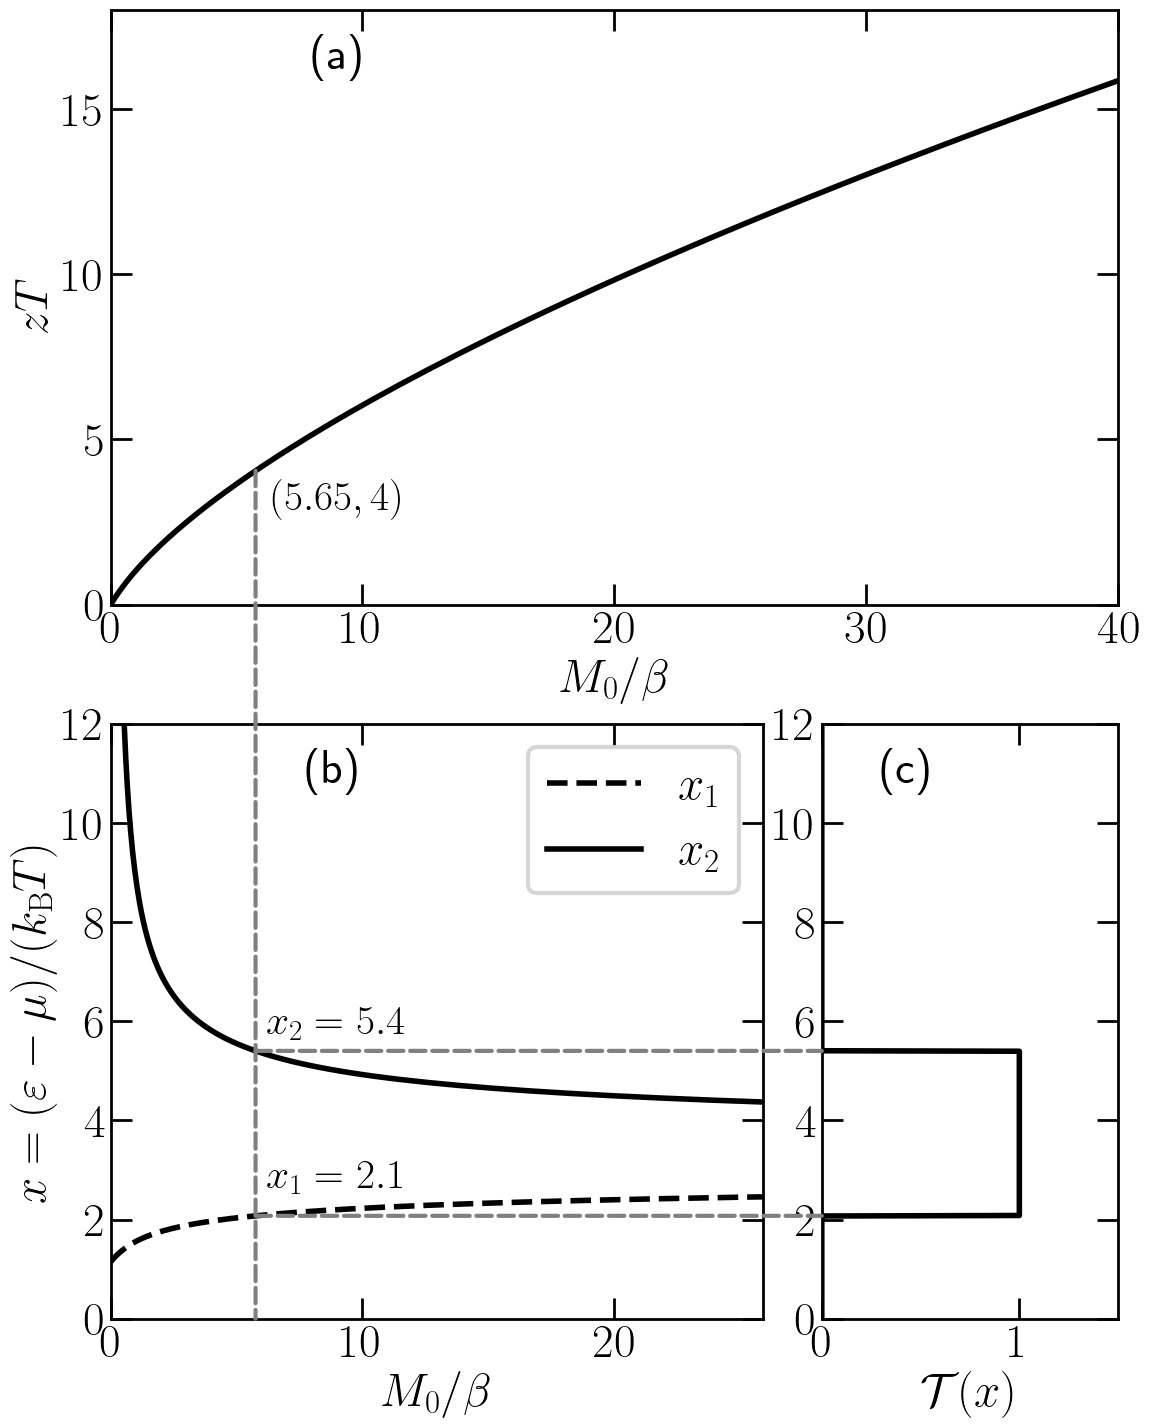

In [3]:
def plot_const():
    data = np.loadtxt('const_dom.csv',delimiter=',')
    fig = plt.figure(figsize=(13, 17))
    ax1 = plt.subplot2grid((2,3), (0,0), colspan=3)
    ax2 = plt.subplot2grid((2,3), (1,0), colspan=2)
    ax3 = plt.subplot2grid((2,3), (1,2))
    ax1.plot(data[:,0], data[:,3], 'k')
    ax1.set_xlim(0.,40.)
    ax1.set_xlabel(r"$M_0/\beta$")
    ax1.set_ylabel(r'$zT$')
    ax1.set_ylim(0,18)
    ax1.text(0.2, 0.9, '(a)',transform=ax1.transAxes)
    ax1.text(0.16, 0.16, r"$(5.65,4)$",transform=ax1.transAxes, fontdict={'size':30})
    ax2.plot(data[:,0],data[:,1], 'k--',label=r'$x_1$')
    ax2.plot(data[:,0],data[:,2], 'k', label=r'$x_2$')
    ax2.legend()
    ax2.set_xlim(0, ax1.transData.inverted().transform([ax2.transAxes.transform([1,0])[0],0])[0])
    # ax2.set_xticks([0,5,10,15])
    ax2.set_xlabel(r"$M_0/\beta$")
    ax2.set_ylim(0,12)
    ax2.set_ylabel(r'$x=(\varepsilon-\mu)/(k_\mathrm{B}T)$')
    ax2.text(0.3, 0.9, '(b)',transform=ax2.transAxes)
    ax2.text(0.24, 0.48, r"$x_2=5.4$",transform=ax2.transAxes, fontdict={'size':30})
    ax2.text(0.24, 0.22, r"$x_1=2.1$",transform=ax2.transAxes, fontdict={'size':30})
    basepoint = data[188]
    boxy = np.linspace(0,12,num=1200)
    boxx = list(map(lambda y: 1 if y else 0, (boxy > basepoint[1]) & (boxy < basepoint[2])))
    ax3.plot(boxx, boxy, 'k')
    ax3.set_xlim(0, 1.5)
    ax3.set_xticks([0,1])
    ax3.set_xlabel(r'$\mathcal{T}(x)$')
    ax3.set_ylim(0,12)
    ax3.text(0.2, 0.9, '(c)',transform=ax3.transAxes)
    fig.add_artist(ConnectionPatch(xyA=(basepoint[0],basepoint[3]), xyB=(basepoint[0],0), coordsA='data', coordsB='data', axesA=ax1, axesB=ax2, color='grey', ls='--'))
    fig.add_artist(ConnectionPatch(xyA=(basepoint[0],basepoint[1]), xyB=(0,basepoint[1]), coordsA='data', coordsB='data', axesA=ax2, axesB=ax3, color='grey', ls='--'))
    fig.add_artist(ConnectionPatch(xyA=(basepoint[0],basepoint[2]), xyB=(0,basepoint[2]), coordsA='data', coordsB='data', axesA=ax2, axesB=ax3, color='grey', ls='--'))
plot_const()

logplot

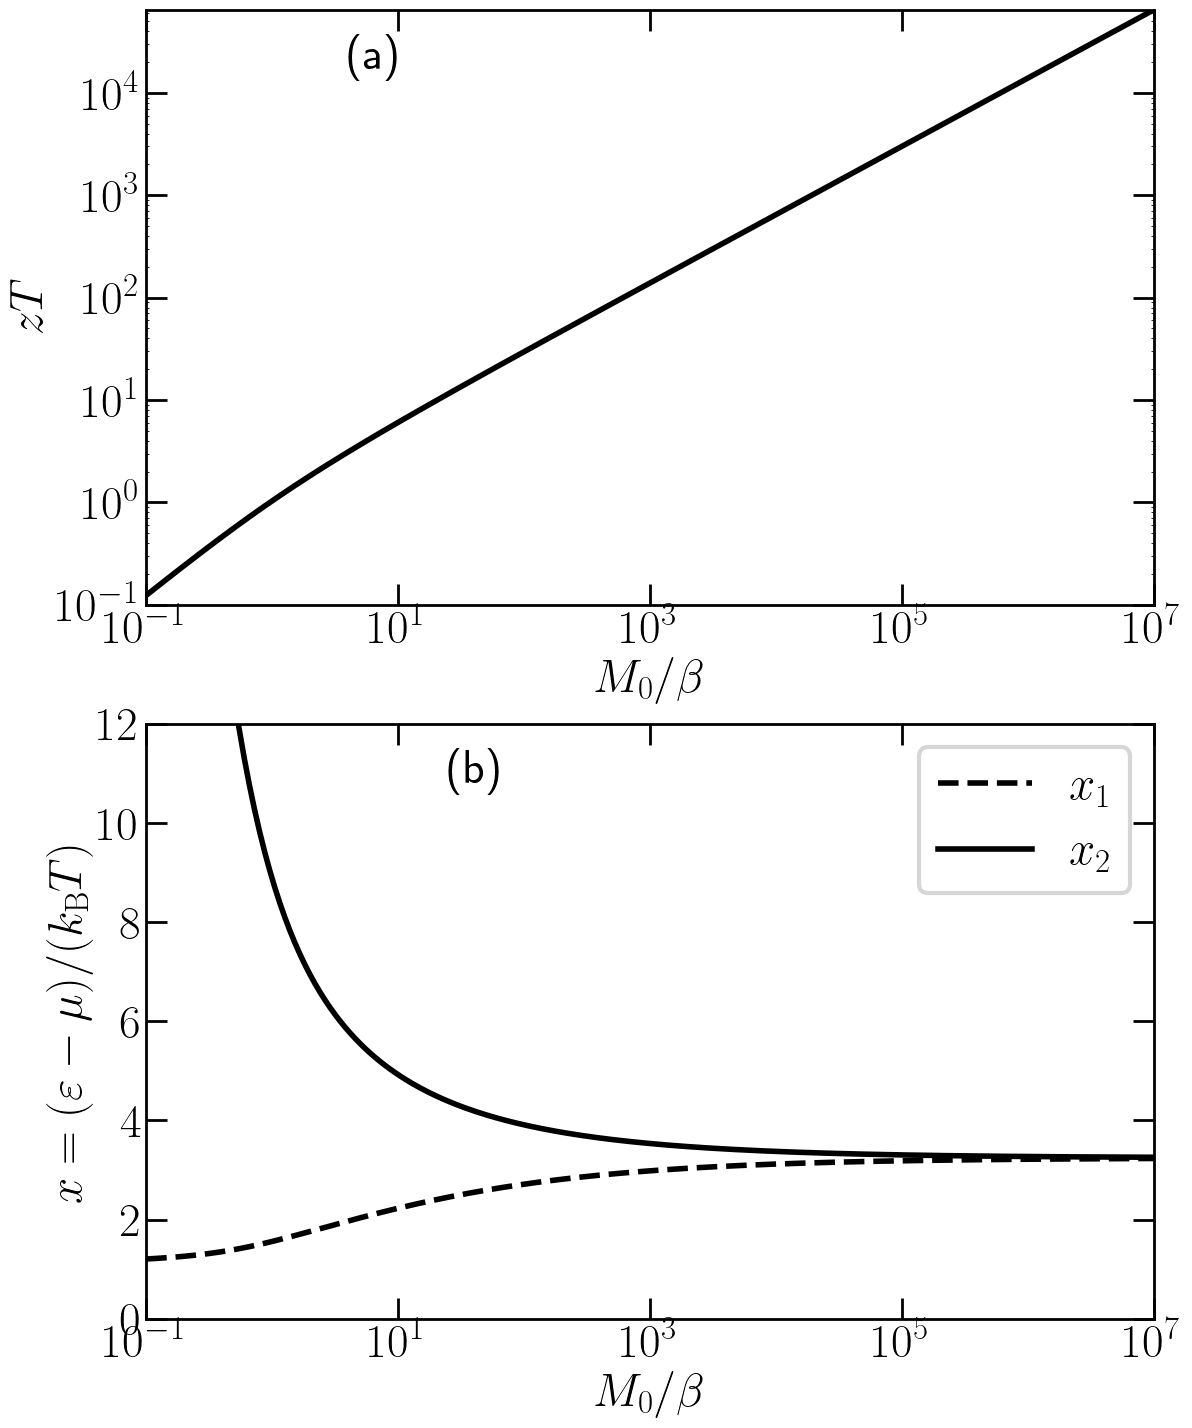

In [38]:
def logplot_const():
    data = np.loadtxt('const_1e7.csv',delimiter=',')
    _, (ax1, ax2) = plt.subplots(2,1, figsize=(13, 17))
    ax1.plot(data[:,0], data[:,3], 'k')
    xlim = (1e-1, 1e7)
    ax1.set_xlim(*xlim)
    ax1.set_xscale("log", base=10)
    ax1.set_xlabel(r"$M_0/\beta$")
    ax1.set_ylim(1e-1, 6.5e4)
    ax1.set_yscale("log", base=10)
    ax1.set_ylabel(r'$zT$')
    ax1.text(0.2, 0.9, '(a)',transform=ax1.transAxes)
    ax2.plot(data[:,0],data[:,1], 'k--',label=r'$x_1$')
    ax2.plot(data[:,0],data[:,2], 'k', label=r'$x_2$')
    ax2.legend()
    ax2.set_xlim(*xlim)
    ax2.set_xscale("log", base=10)
    ax2.set_xlabel(r"$M_0/\beta$")
    ax2.set_ylim(0, 12)
    # ax2.set_yscale("log", base=10)
    ax2.set_ylabel(r'$x=(\varepsilon-\mu)/(k_\mathrm{B}T)$')
    ax2.text(0.3, 0.9, '(b)',transform=ax2.transAxes)
logplot_const()

## DoM of TIs

In [8]:
from equation import solve4beta
def ti_opt(mu, vw, gap, cw):
    dom_ti = lambda x: dom.ti(x, mu, vw, gap, cw)
    opt_win = solve4beta(dom_ti, guess=[2,4])
    _, (ax1, ax2) = plt.subplots(2,1, figsize=(13, 17))
    x_range = np.linspace(-10,10,500)
    ax1.plot(x_range, dom_ti(x_range))
    ax1.set_xlabel('$x$')
    ax1.set_ylabel('$M$')
    ax1.set_xlim(-10,10)
    ax1.set_ylim(0,10)
    ax2.plot(opt_win[:,0], opt_win[:,1], label=r'$x_1$')
    ax2.plot(opt_win[:,0], opt_win[:,2], label=r'$x_2$')
    ax2.legend()
    ax2.set_xlabel(r'$1/\beta$')
    ax2.set_ylabel('$x$')
    ax2.set_xlim(0, 30)
    ax2.set_ylim(0, 12)

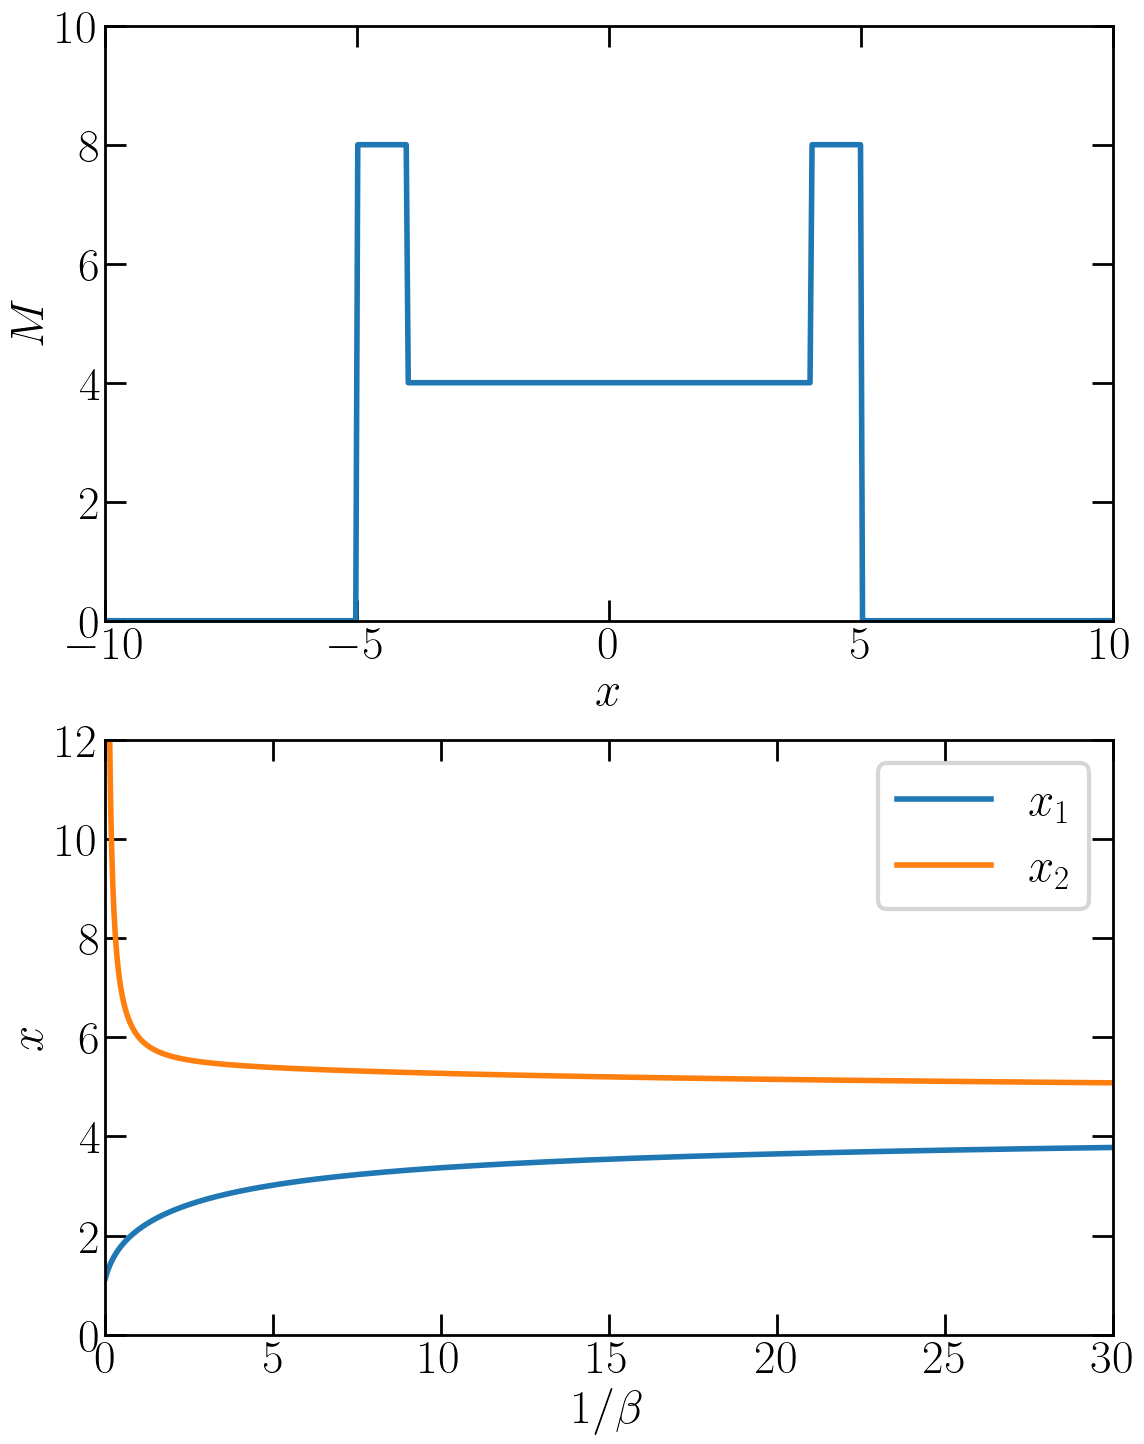

In [11]:
ti_opt(0,1,8,1)

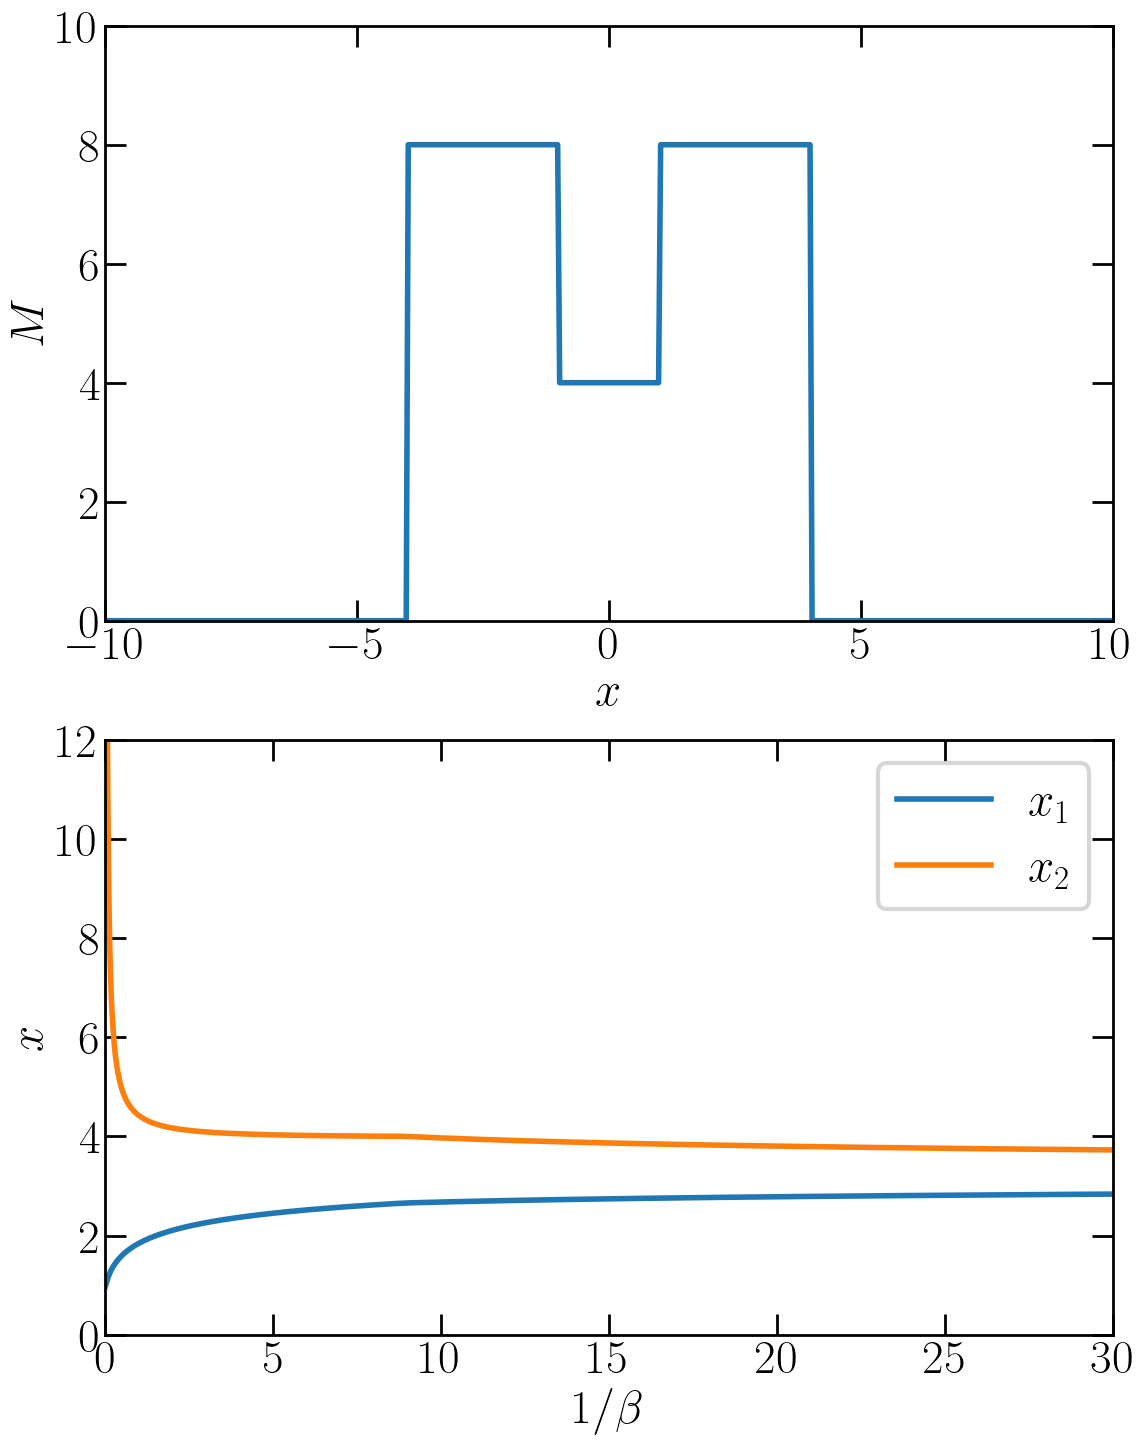

In [9]:
ti_opt(0,3,2,3)

## DoM of Basin

In [24]:
from equation import solve4beta
def basin_opt(mu, gap, bscale='linear', xrange=15., opt_win=None):
    """Plot optimal window for a basin-shaped DoM
    
    Args:
        bscale: scale of beta. Can be 'linear' or 'log'.
    """
    dom_basin = lambda x: dom.basin(x, mu, gap)
    if opt_win:
        opt_win = np.loadtxt(opt_win, delimiter=',')
    else:
        opt_win = solve4beta(dom_basin, beta_range=np.logspace(-7, 1, 401), guess=[2,6])
        np.savetxt('basin/{}_{}.csv'.format(mu,gap), opt_win, delimiter=',')
    _, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(13, 17))
    x_range = np.linspace(-xrange, xrange, 500)
    ax1.plot(x_range, dom_basin(x_range), 'k')
    ax1.set_xlabel('$x$')
    ax1.set_ylabel('$M$')
    ax1.set_xlim(-xrange,xrange)
    ax1.set_ylim(0,10)
    ax1.text(0.2, 0.9, '(a)',transform=ax1.transAxes)
    ax2.plot(opt_win[:,0], opt_win[:,1], 'k--', label=r'$x_1$')
    ax2.plot(opt_win[:,0], opt_win[:,2], 'k', label=r'$x_2$')
    ax2.legend()
    ax2.set_xlabel(r'$1/\beta$')
    ax2.set_ylabel('$x$')
    ax2.set_ylim(0, 12)
    ax2.text(0.2, 0.9, '(b)',transform=ax2.transAxes)
    ax3.plot(opt_win[:,0], opt_win[:,3], 'k')
    ax3.set_xlabel(r'$1/\beta$')
    ax3.set_ylabel('$zT$')
    ax3.text(0.2, 0.9, '(c)',transform=ax3.transAxes)
    match bscale:
        case 'linear':
            ax2.set_xlim(0, 30)
            ax3.set_xlim(0, 30)
            ax3.set_ylim(0, 50)
        case 'log':
            ax2.set_xlim(1e-1, 1e5)
            ax2.set_xscale("log", base=10)
            ax3.set_xlim(1e-1, 1e5)
            ax3.set_xscale("log", base=10)
            ax3.set_ylim(0,1.25e4)
    plt.tight_layout()

beta start at 1.0


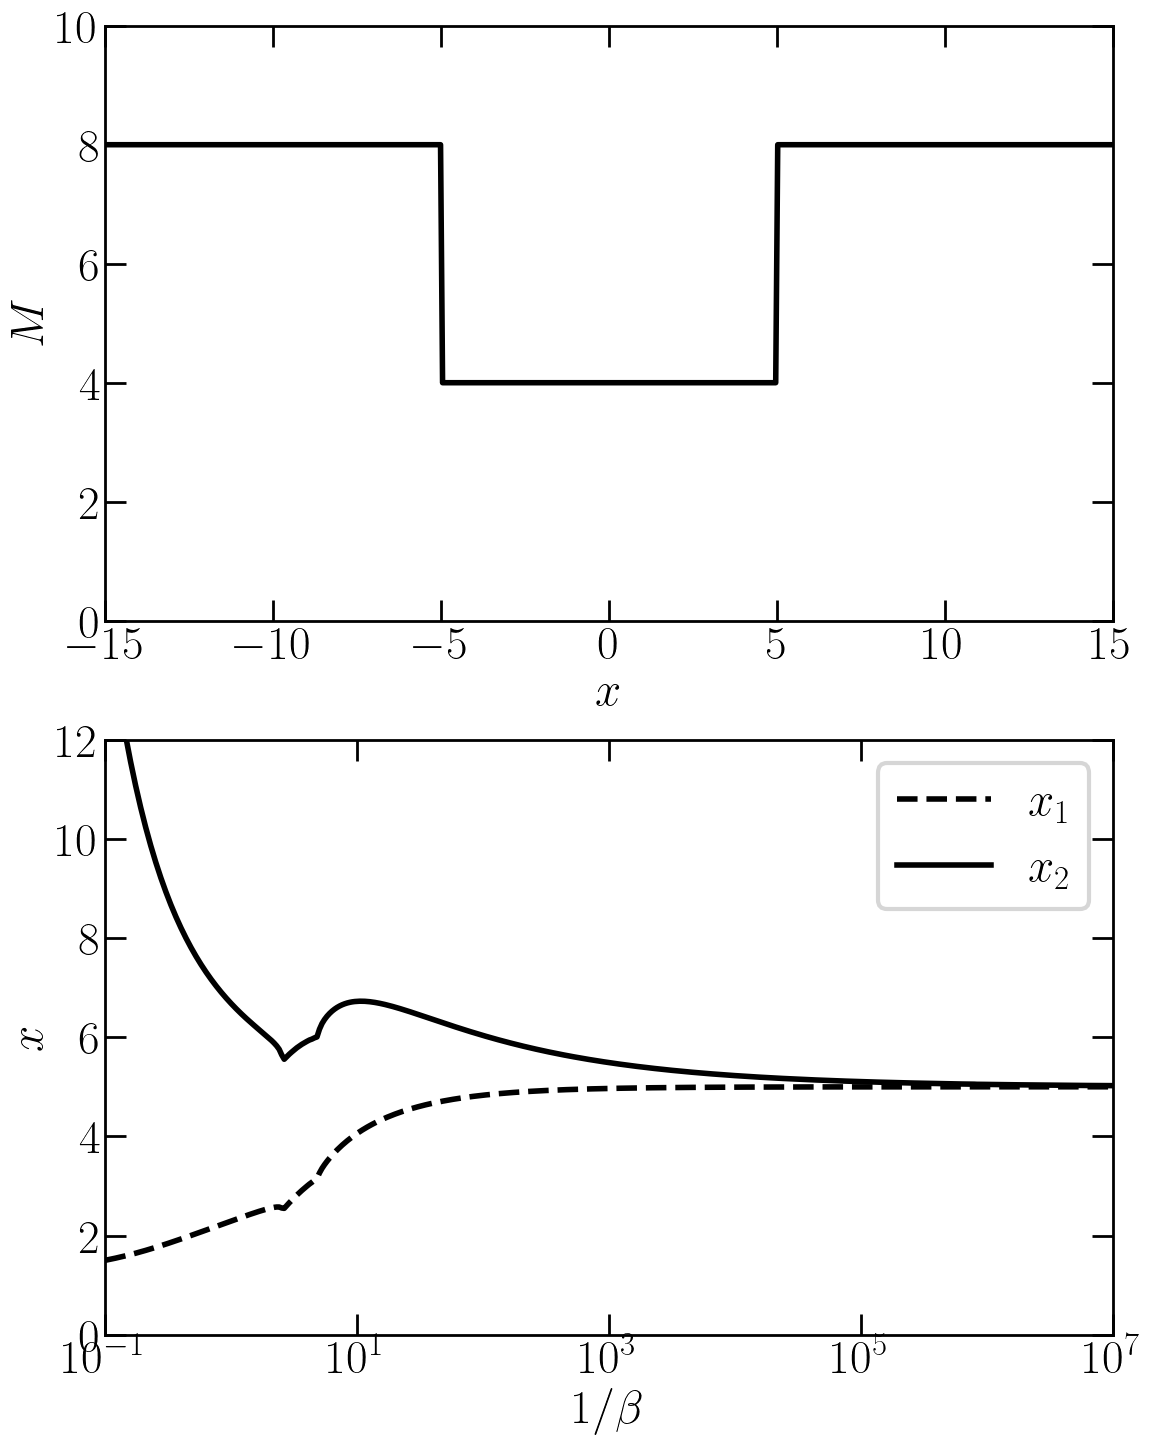

In [4]:
basin_opt(0, 10, bscale='log')

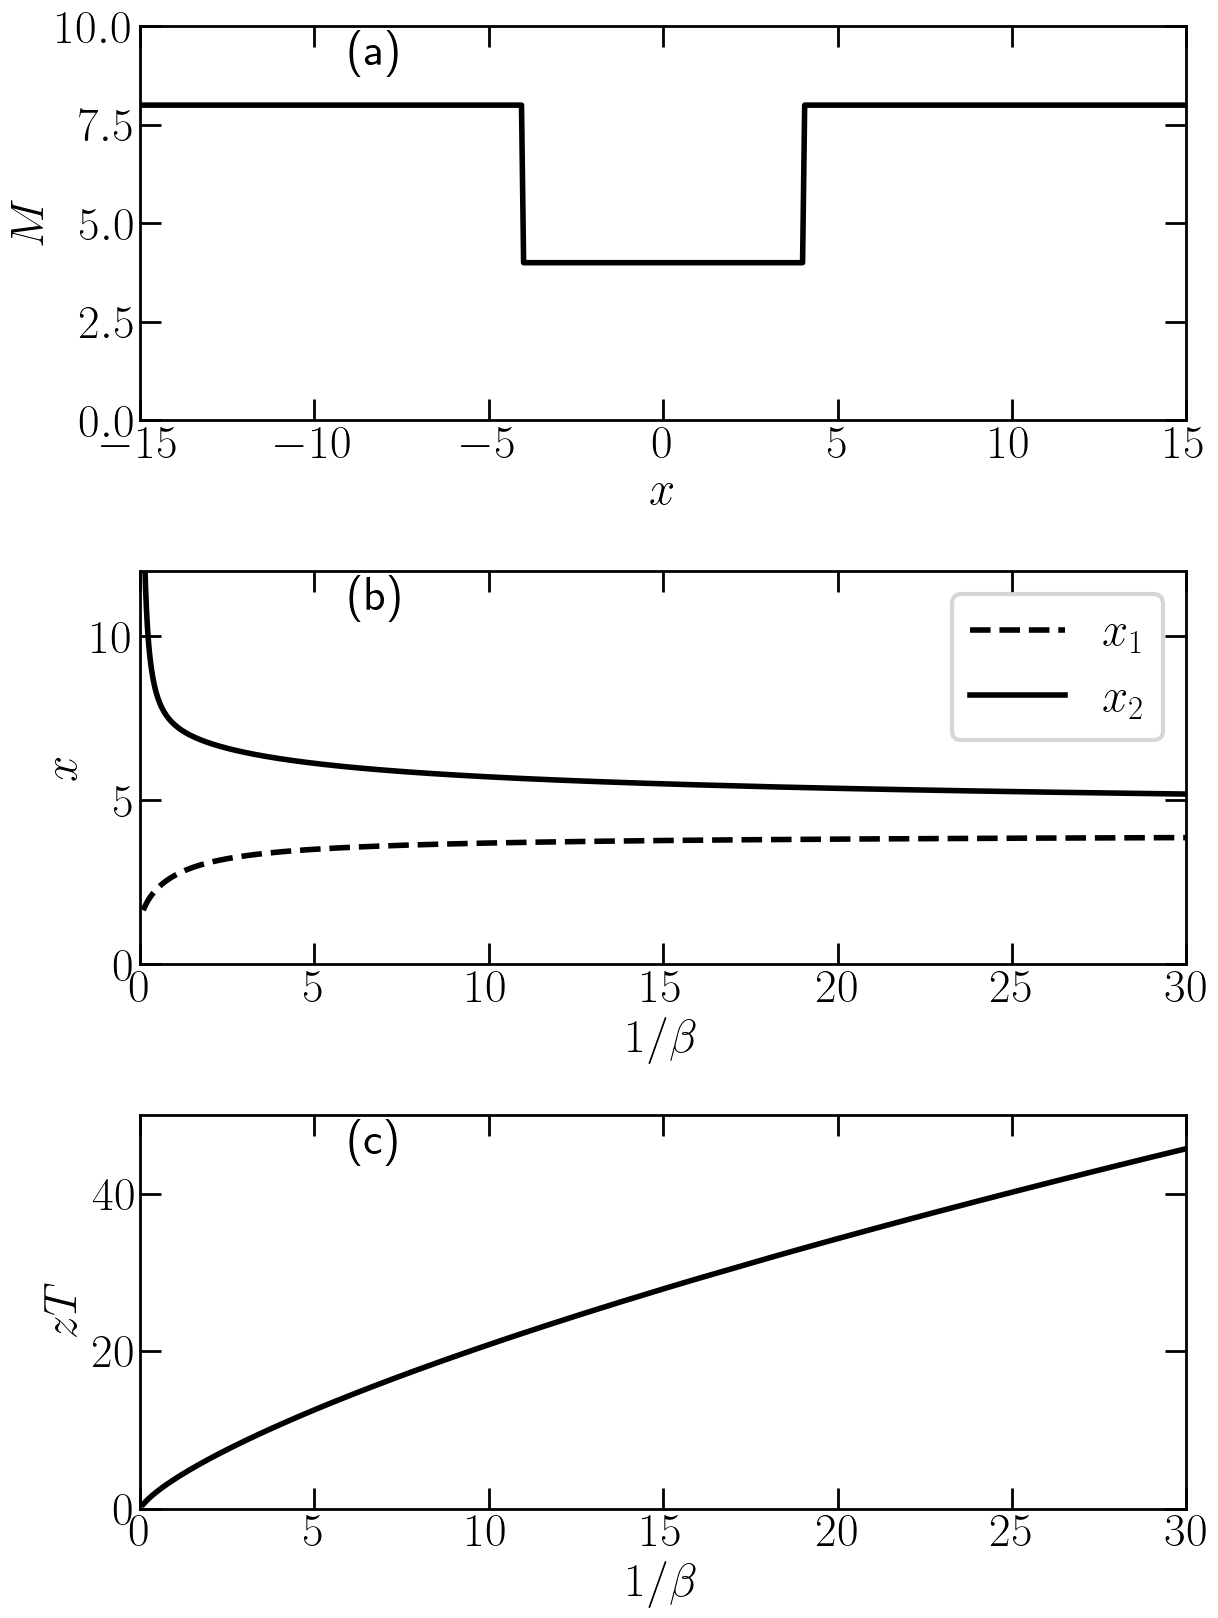

In [20]:
basin_opt(0, 8, opt_win='basin_0_8.csv')

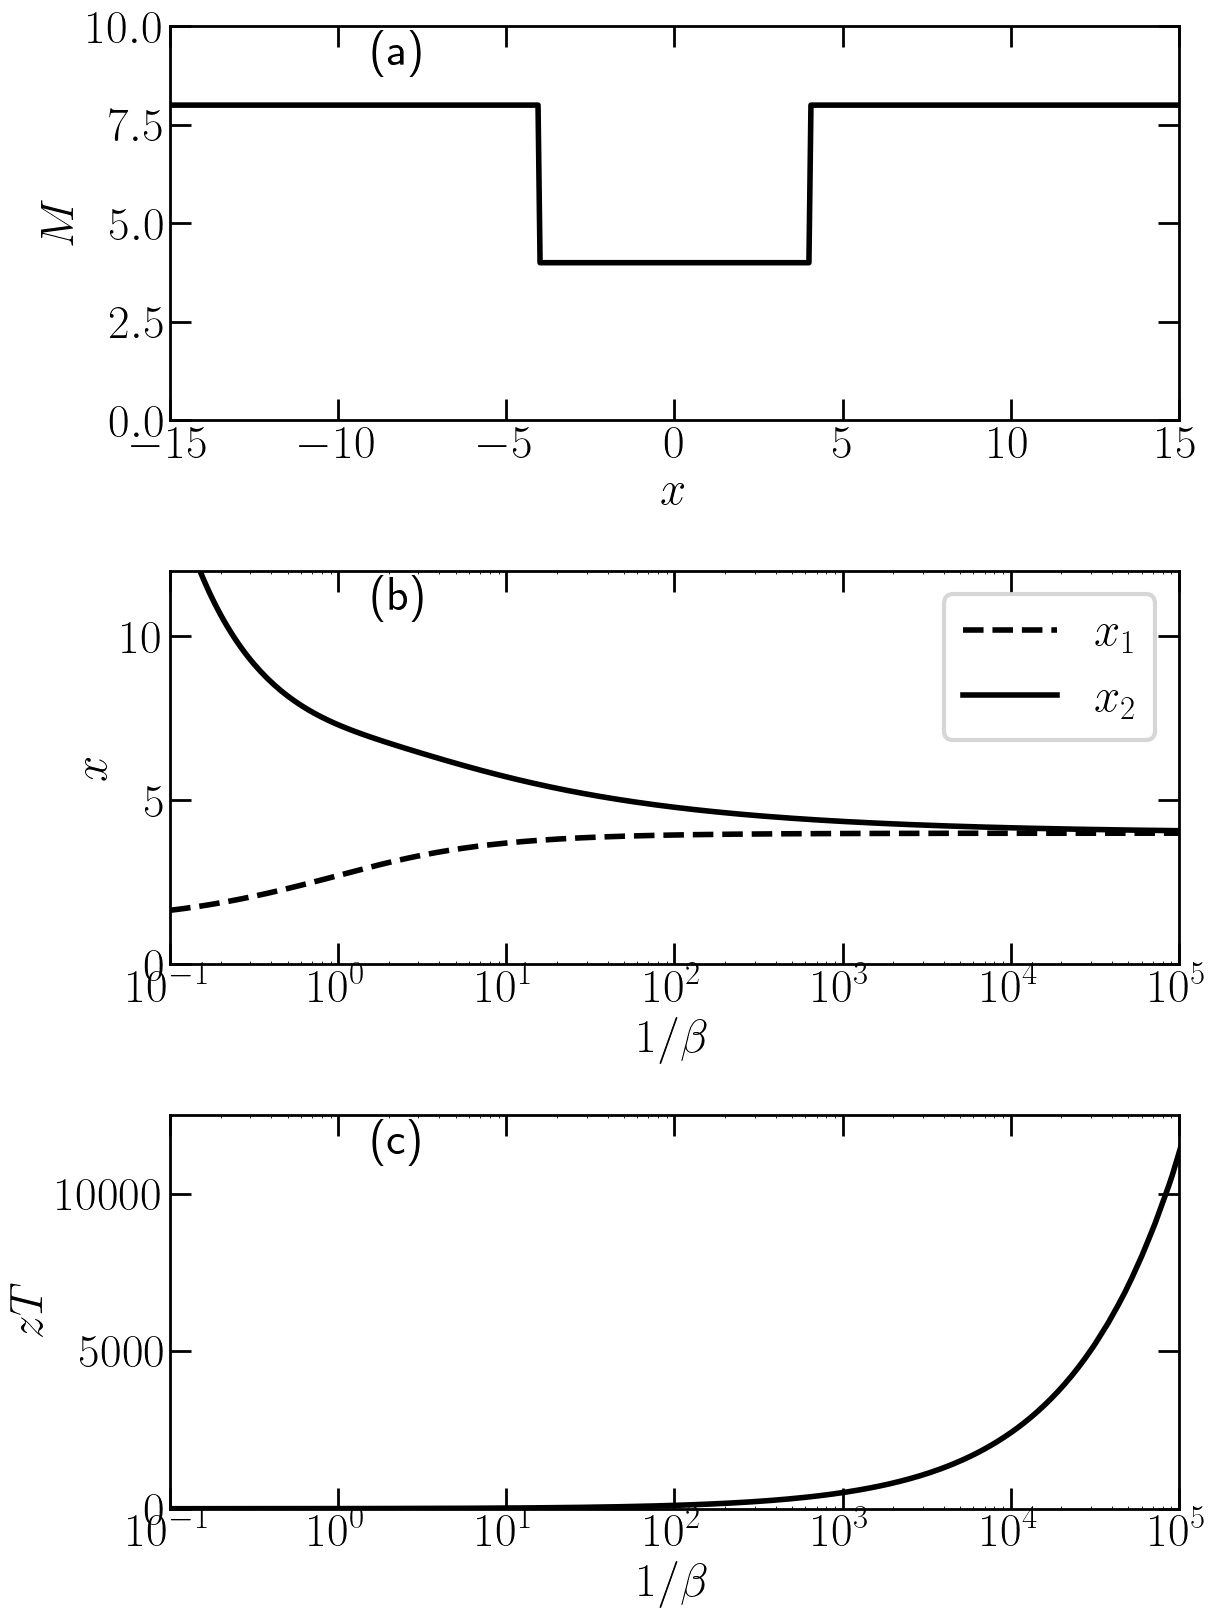

In [25]:
basin_opt(0, 8, bscale='log', opt_win='basin_0_8.csv')

## Optimize Power Factor

Equivatent to optimizing $zT$ as $\beta\rightarrow\infty$.

$x_{\infty}$ satisfies $2x_{\infty}I_0(x_{\infty},\infty)=I_1(x_{\infty},\infty)$.

In [11]:
from equation import I
from scipy.optimize import root
def eq0(x):
    return 2*x*I(x, np.inf, 0, dom.const) -I(x, np.inf, 1, dom.const)

In [12]:
x0 = root(eq0, 1.1).x
print(x0)

[1.14455444]


## Illustration

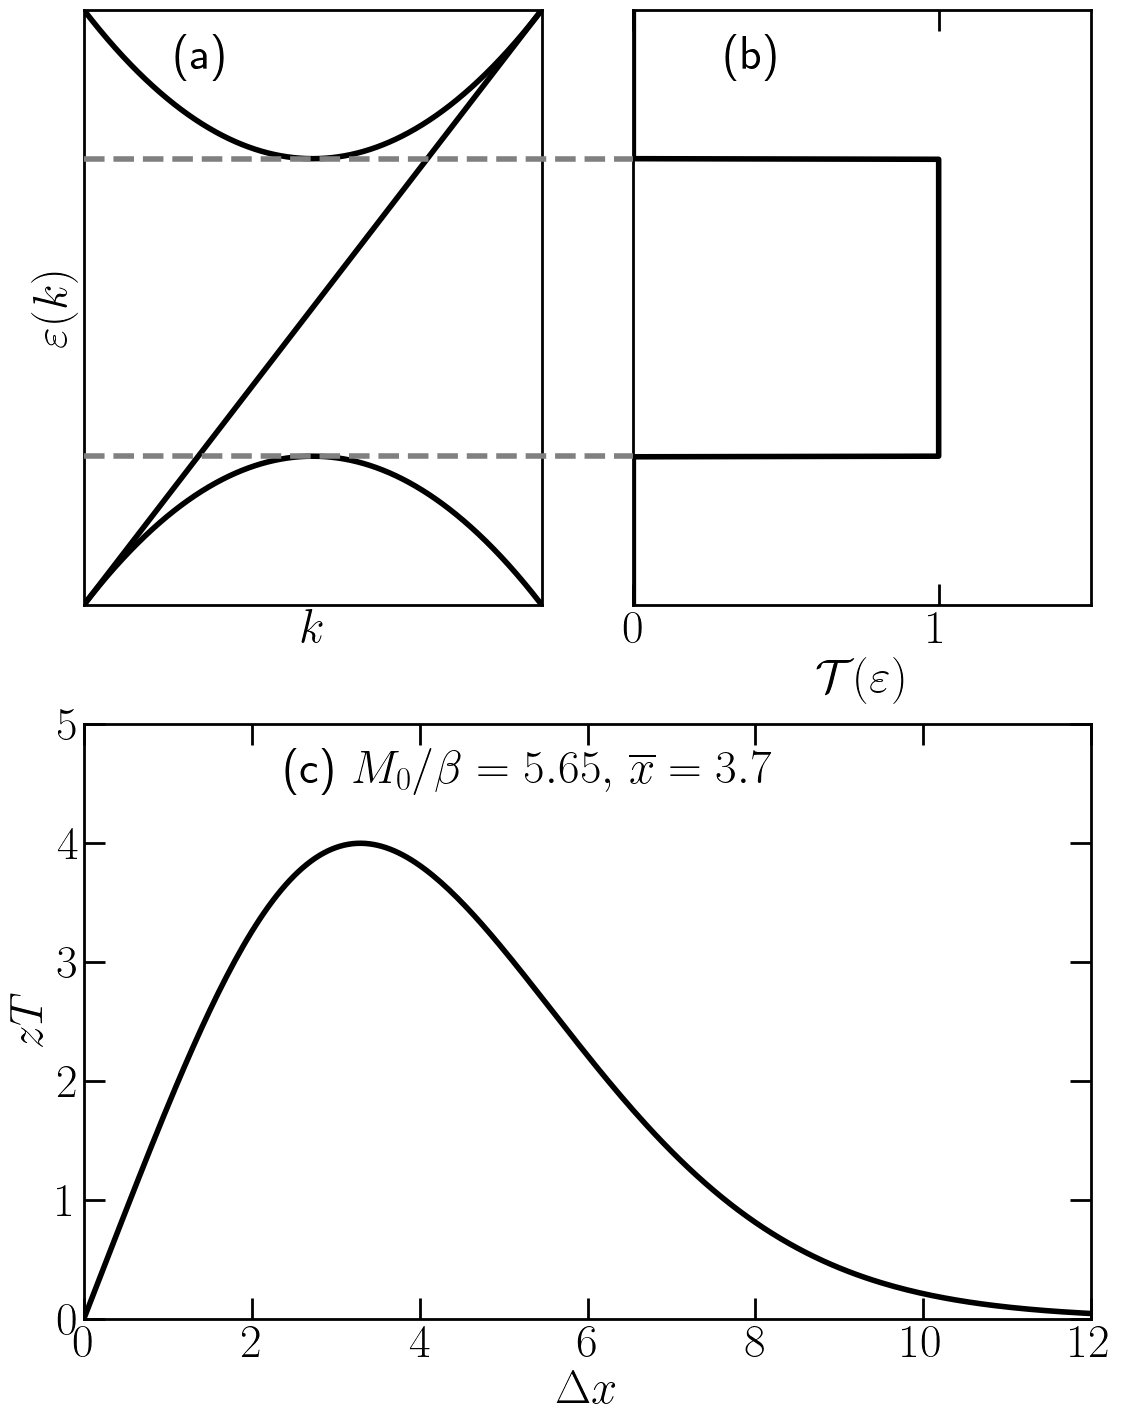

In [6]:
def plot_illustration():
    fig = plt.figure(figsize=(13, 17))
    ax1 = plt.subplot2grid((2,2), (0,0))
    ax2 = plt.subplot2grid((2,2), (0,1))
    ax3 = plt.subplot2grid((2,2), (1,0), colspan=2)
    x = np.array(range(-500, 501))
    y0 = x**2/500**2
    transFigure = fig.transFigure.inverted()
    x2 = [0]*300+[1]*200+[0]*500
    y30 = np.array(range(1001))/1000
    y31 = 0.25*(1-y0)
    y32 = 1-y31
    ax1.plot(y30,'k',y31,'k',y32,'k')
    ax1.set_xticks([])
    ax1.set_xlim([0,1000])
    ax1.set_xlabel(r'$k$')
    ax1.set_yticks([])
    ax1.set_ylim([0,1])
    ax1.set_ylabel(r'$\varepsilon(k)$')
    ax1.text(0.2, 0.9, '(a)',transform=ax1.transAxes)
    coord30 = transFigure.transform(ax1.transData.transform([0,0.25]))
    coord31 = transFigure.transform(ax1.transData.transform([0,0.75]))
    x4 = [0]*250+[1]*500+[0]*250
    y4=range(1000)
    ax2.plot(x4, y4, 'k')
    ax2.set_xticks([0,1])
    ax2.set_xlim([0,1.5])
    ax2.set_xlabel(r'$\mathcal{T}(\varepsilon)$')
    ax2.set_ylim([0,1000])
    ax2.set_yticks([])
    ax2.text(0.2, 0.9, '(b)',transform=ax2.transAxes)
    coord40 = transFigure.transform(ax2.transData.transform([0,250]))
    coord41 = transFigure.transform(ax2.transData.transform([0,750]))
    line3 = matplotlib.lines.Line2D(
        (coord30[0],coord40[0]),(coord30[1],coord40[1]),
        transform=fig.transFigure, ls='--', color='grey')
    line4 = matplotlib.lines.Line2D(
        (coord31[0],coord41[0]),(coord31[1],coord41[1]),
        transform=fig.transFigure, ls='--', color='grey')
    fig.lines = [line3, line4]
    zTvdx = np.loadtxt('zT_vs_dx.csv',delimiter=',')
    ax3.plot(zTvdx[:,0], zTvdx[:,1], 'k')
    ax3.set_xlabel(r"${\Delta}x$") # 
    ax3.set_ylabel(r'$zT$')
    # ax.legend()
    ax3.text(0.2, 0.9, r"(c) $M_0/\beta=5.65,\,\overline{x}=3.7$", transform=ax3.transAxes)
    ax3.set_ylim([0,5])
    ax3.set_xlim([0,12])
plot_illustration()

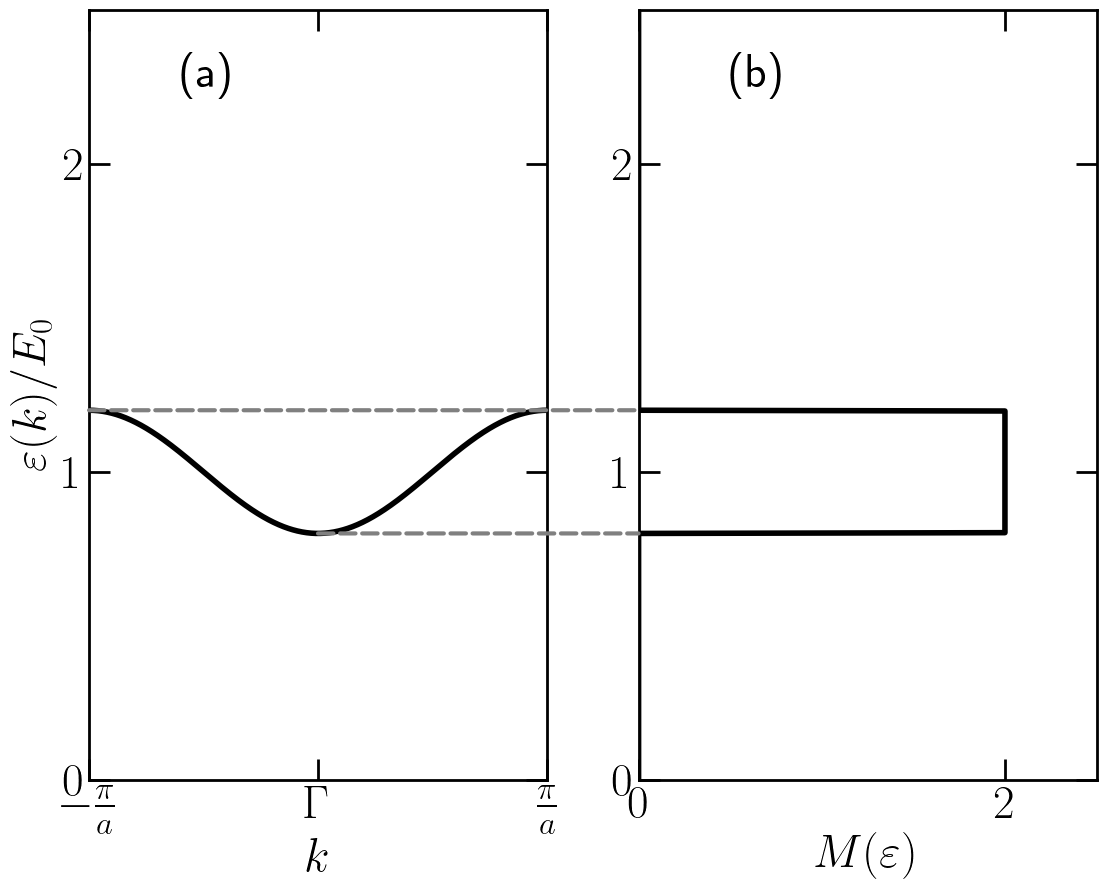

In [8]:
def oneD_plot():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 10))
    x1 = np.linspace(-np.pi, np.pi, num=1001)
    y1 = (1-0.2*np.cos(x1))
    yrange=[0, 2.5]
    ax1.plot(x1, y1, 'k')
    ax1.set_xlim([-np.pi, np.pi])
    ax1.set_xticks([-np.pi, 0, np.pi])
    ax1.set_xticklabels([r'$-\frac{\pi}{a}$', r'$\Gamma$', r'$\frac{\pi}{a}$'])
    ax1.set_xlabel(r'$k$')
    ax1.set_ylim(yrange)
    ax1.set_yticks([0,1,2])
    ax1.set_ylabel(r'$\varepsilon(k)/E_0$')
    ax1.text(0.2, 0.9, '(a)',transform=ax1.transAxes)
    y2 = np.linspace(*yrange,num=1001)
    x2 = list(map(lambda x: 2 if (x>min(y1) and x<max(y1)) else 0, y2))
    ax2.plot(x2,y2, 'k')
    ax2.set_xlim([0,2.5])
    ax2.set_xticks([0,2])
    ax2.set_xlabel(r'$M(\varepsilon)$')
    ax2.set_ylim(yrange)
    ax2.set_yticks([0,1,2])
    ax2.text(0.2, 0.9, '(b)',transform=ax2.transAxes)
    fig.add_artist(ConnectionPatch(xyA=(0, min(y1)), xyB=(0, min(y1)), coordsA='data', coordsB='data', axesA=ax1, axesB=ax2, color='grey', ls='--'))
    fig.add_artist(ConnectionPatch(xyA=(-np.pi, max(y1)), xyB=(0, max(y1)), coordsA='data', coordsB='data', axesA=ax1, axesB=ax2, color='grey', ls='--'))
oneD_plot()

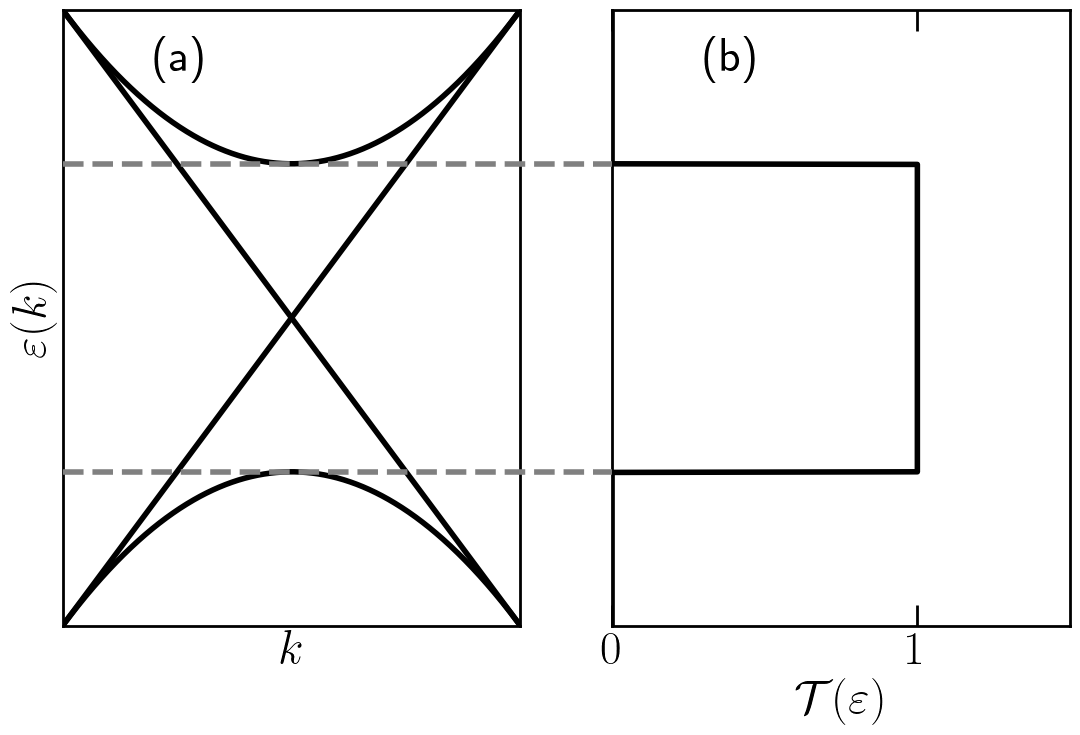

In [4]:
def topo_illu():
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(13, 8))
    x = np.array(range(-500, 501))
    y0 = x**2/500**2
    transFigure = fig.transFigure.inverted()
    x2 = [0]*300+[1]*200+[0]*500
    y30 = np.array(range(1001))/1000
    y31 = 0.25*(1-y0)
    y32 = 1 - y31
    y33 = 1 - y30
    ax1.plot(y30,'k',y31,'k',y32,'k',y33,'k')
    ax1.set_xticks([])
    ax1.set_xlim([0,1000])
    ax1.set_xlabel(r'$k$')
    ax1.set_yticks([])
    ax1.set_ylim([0,1])
    ax1.set_ylabel(r'$\varepsilon(k)$')
    ax1.text(0.2, 0.9, '(a)',transform=ax1.transAxes)
    coord30 = transFigure.transform(ax1.transData.transform([0,0.25]))
    coord31 = transFigure.transform(ax1.transData.transform([0,0.75]))
    x4 = [0]*250+[1]*500+[0]*250
    y4=range(1000)
    ax2.plot(x4, y4, 'k')
    ax2.set_xticks([0,1])
    ax2.set_xlim([0,1.5])
    ax2.set_xlabel(r'$\mathcal{T}(\varepsilon)$')
    ax2.set_ylim([0,1000])
    ax2.set_yticks([])
    ax2.text(0.2, 0.9, '(b)',transform=ax2.transAxes)
    coord40 = transFigure.transform(ax2.transData.transform([0,250]))
    coord41 = transFigure.transform(ax2.transData.transform([0,750]))
    line3 = matplotlib.lines.Line2D(
        (coord30[0],coord40[0]),(coord30[1],coord40[1]),
        transform=fig.transFigure, ls='--', color='grey')
    line4 = matplotlib.lines.Line2D(
        (coord31[0],coord41[0]),(coord31[1],coord41[1]),
        transform=fig.transFigure, ls='--', color='grey')
    fig.lines = [line3, line4]
topo_illu()

## ${\Delta}x$ vs. $\beta$

In [12]:
def dx_beta(data, xlim=None, ylim=None, xlabel=r"$\beta$"):
    data = np.loadtxt(data,delimiter=',')
    fig, ax = plt.subplots(figsize=(13, 8))
    ax.plot(1/data[:,0], data[:,2]-data[:,1], 'k')
    ax.set_xlabel(xlabel)
    if xlim:
        ax.set_xlim(*xlim)
    ax.set_xscale("log")
    ax.set_ylabel(r"${\Delta}x$")
    if ylim:
        ax.set_ylim(*ylim)
    ax.set_yscale("log")

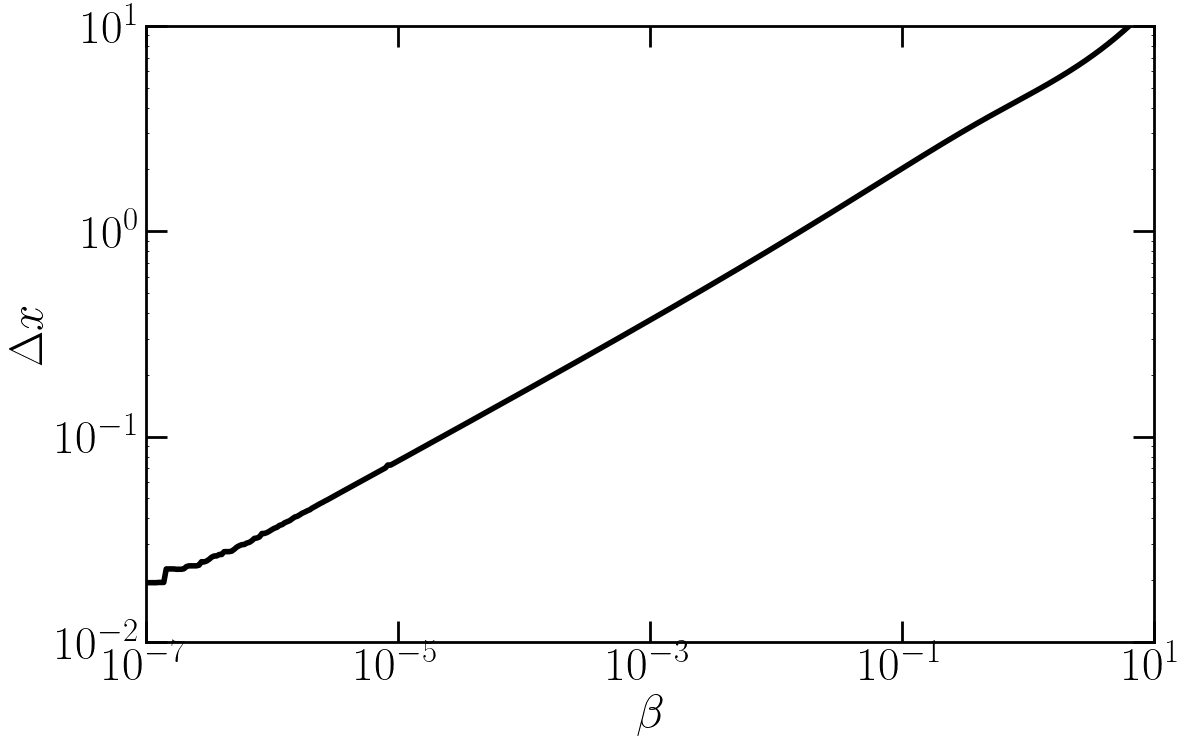

In [8]:
dx_beta('basin_0_8.csv', (1e-7,1e1), (1e-2,1e1))

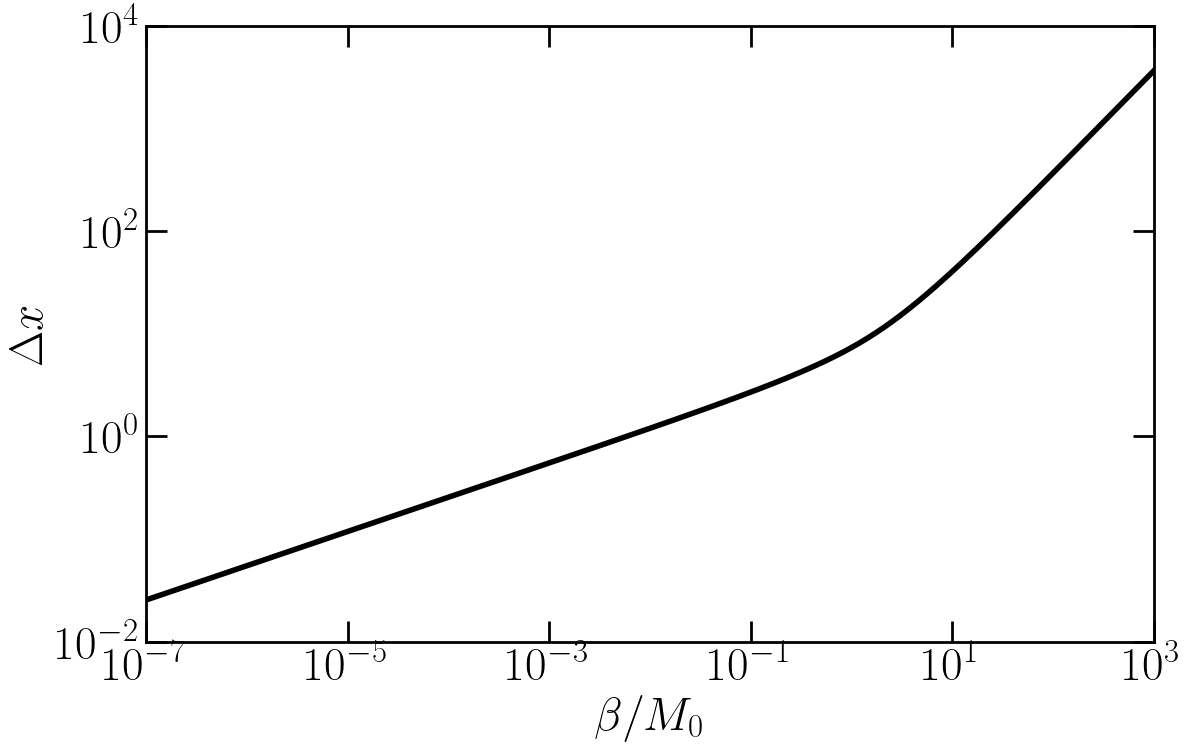

In [13]:
dx_beta('const_1e7.csv', (1e-7,1e3), (1e-2,1e4), xlabel=r"$\beta/M_0$")